In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

In [6]:
import pandas as pd
from fbprophet import Prophet

In [7]:
df = pd.read_csv('dataset.csv')

In [8]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [9]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [10]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [11]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

In [12]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3040.462653,719.077895,4025.322134,3040.462653,3040.462653,-645.839364,-645.839364,-645.839364,463.68979,...,16.643716,16.643716,16.643716,-1126.172870,-1126.172870,-1126.172870,0.0,0.0,0.0,2394.623289
1,2018-01-02,3041.255696,901.160918,3900.868864,3041.255696,3041.255696,-655.816581,-655.816581,-655.816581,463.68979,...,-11.263085,-11.263085,-11.263085,-1108.243287,-1108.243287,-1108.243287,0.0,0.0,0.0,2385.439115
2,2018-01-03,3042.048740,860.066473,3917.340505,3042.048740,3042.048740,-629.836306,-629.836306,-629.836306,463.68979,...,-4.394888,-4.394888,-4.394888,-1089.131208,-1089.131208,-1089.131208,0.0,0.0,0.0,2412.212434
3,2018-01-04,3042.841783,905.074019,4097.485359,3042.841783,3042.841783,-582.757660,-582.757660,-582.757660,463.68979,...,22.467514,22.467514,22.467514,-1068.914964,-1068.914964,-1068.914964,0.0,0.0,0.0,2460.084123
4,2018-01-05,3043.634827,848.301165,3931.793930,3043.634827,3043.634827,-618.630432,-618.630432,-618.630432,463.68979,...,-34.594707,-34.594707,-34.594707,-1047.725516,-1047.725516,-1047.725516,0.0,0.0,0.0,2425.004394


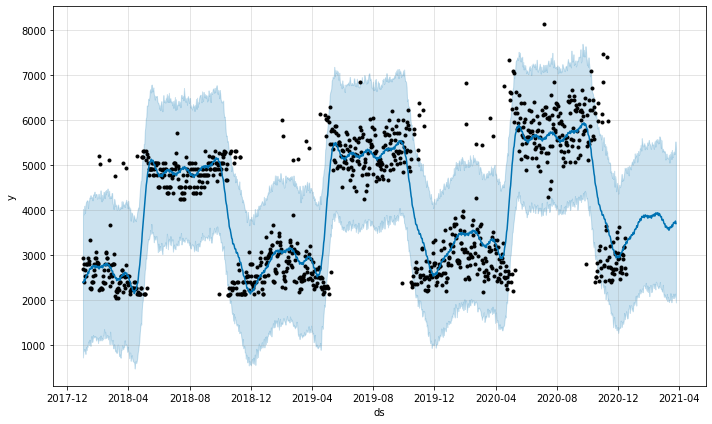

In [13]:
plot1 = m.plot(forecast)

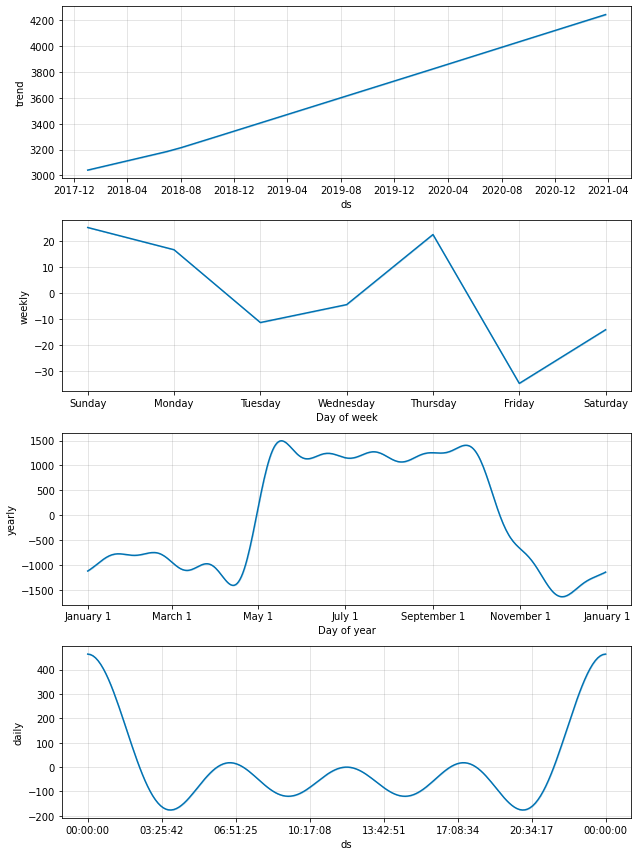

In [14]:
plt2 = m.plot_components(forecast)